# `Практикум по программированию на языке Python`
<br>

## `Занятие 6: Представление, обработка, анализ и визуализация данных`
<br><br>

### `Мурат Апишев (mel-lain@yandex.ru)`

#### `Москва, 2023`

In [1]:
import warnings
warnings.filterwarnings('ignore')

### `Представление матрицы в Python`

Простейший вариант - список списков:

In [1]:
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
]

B = [
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3],
]

def print_matrix(A):
    for row in A:
        print(row)
    print()

print_matrix(A)
print_matrix(B)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

[1, 0, 0]
[0, 2, 0]
[0, 0, 3]



In [2]:
def timed(method):
    import time
    def __timed(*args, **kw):
        time_start = time.time()
        result = method(*args, **kw)
        time_end = time.time()
        
        print('{}  {:.3f} ms\n'.format(method.__name__,
                                      (time_end - time_start) * 1000))
        return result

    return __timed

### `Опишем базовые операции: сложение`

In [3]:
@timed
def matrix_add(A, B):
    # skip correctness of dimensions check

    n, m = len(A), len(A[0])
    C = [[0.0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            C[i][j] = A[i][j] + B[i][j]
    return C

print_matrix(matrix_add(A, B))

matrix_add  0.006 ms

[2, 2, 3]
[4, 7, 6]
[7, 8, 12]



### `Опишем базовые операции: транспонирование`

In [4]:
@timed
def matrix_transpose(A):
    n, m = len(A), len(A[0])
    C = [[0.0 for _ in range(n)] for _ in range(m)]

    for i in range(n):
        for j in range(m):
            C[j][i] = A[i][j]
    return C

print_matrix(matrix_transpose(A))

matrix_transpose  0.005 ms

[1, 4, 7]
[2, 5, 8]
[3, 6, 9]



### `Опишем базовые операции: умножение`

In [5]:
def dot(a, b):
    return sum(x * y for (x, y) in zip(a, b))

@timed
def matrix_mul(A, B):
    # check correctness of dimensions
    n, m = len(A), len(B[0])
    C = [[0.0 for _ in range(n)] for _ in range(m)]

    B_T = matrix_transpose(B)
    for i in range(n):
        for j in range(m):
            C[i][j] = dot(A[i], B_T[j]) 
    return C

print_matrix(matrix_mul(A, B))

matrix_transpose  0.004 ms

matrix_mul  0.347 ms

[1, 4, 9]
[4, 10, 18]
[7, 16, 27]



### `Библиотека NumPy`

- Позволяет работать с многомерными массивами<br><br>

- Реализует множество базовых матричных операций<br><br>

- Работает на порядки быстрее самописных реализаций в Python<br><br>

- Поддерживается большинством сторонних модулей, работающих с матрицами<br><br>

In [6]:
import numpy as np

### `Почему NumPy быстрая`

- Значительная часть кода написана на C<br><br>

- Базовым классом является `ndarray`, имеющий следующие отличия от списков:

    1. NumPy array имеет фиксированную длину, задаваемую в момент его создания (списки в Python могут менять размер динамически)

    2. Все элементы в NumPy array имеют один тип<br><br>

- NumPy array хранится в памяти в виде одного последовательного блока, что позволяет эффективно использовать процессорный кэш и векторные инструкции<br><br>

- NumPy можно подключить к высокооптимизированным библиотекам для матричной алгебры (BLAS, LAPACK, Intel MKL)<br><br>

- Часть матричных операций может быть распараллелена при наличии в системе нескольких потоков


### `Способы создания NumPy array`

1. Пустой
2. Заполненный нулями
3. Заполненный единицами
4. Заполненный нужным значением

In [7]:
print(np.empty(shape=[2, 3]))  # values are arbitrary

[[4.6597887e-310 0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000]]


In [8]:
print(np.zeros([2, 3]))

[[0. 0. 0.]
 [0. 0. 0.]]


In [9]:
print(np.ones([2, 3]))

[[1. 1. 1.]
 [1. 1. 1.]]


In [10]:
print(np.full([2, 3], 3.0))

[[3. 3. 3.]
 [3. 3. 3.]]


### `Способы создания NumPy array`

5. На основе списков

In [11]:
print(np.array([[1, 2, 3], [4, 5, 6]]))

[[1 2 3]
 [4 5 6]]


Число элементов должно удовлетворять размерности, numpy попытается преобразовать типы:

In [12]:
print(np.array([[1, 2, 3], [4, 6]]))

[list([1, 2, 3]) list([4, 6])]


Тип можно указать явно, и неправильное число элементов приведёт к ошибке:

In [ ]:
np.array([[1, 2, 3], [4, 6]], dtype=np.float32)

### `Важные параметры создания ndarray`

- `shape` - список или кортеж с размерностями создаваемого массива<br><br>

- `dtype` - указание типа элементов массива, если массив создаётся на базе объектов из Python, то должно существовать преобразование из типа этих объектов в указываемый тип<br><br>

- `order` - порядок хранения данных в памяти, по строкам (C-order) или же по столбцам (Fortran-order). По-умолчанию используется C-order

### `Отличие классов np.ndarray и np.matrix`

- `ndarray` - более общий класс, поддерживающий все возможные операции<br><br>

- `matrix` - более узкий класс, наследующий `ndarray`. Он поддерживает несколько операций и атрибутов, специфичных для матриц, в удобной нотации<br><br>

- При этом все те же операции можно применять и к `ndarray`, если он двумерный и состоит из чисел (начиная с Python 3.5 умножение можно записать как `A @ B`)<br><br>

- Рекомендуется пользоваться `ndarray`, чтобы не вносить путаницу в код и не проверять каждый раз, какого именно типа массив будет обрабатываться

### `Изменение размерности`

`reshape` позволяет изменить размерности массива __без изменения общего числа элементов__:

In [15]:
a = np.zeros([2, 3, 2])
print(a, a.shape)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]] (2, 3, 2)


In [16]:
b = a.reshape((1, 2 * 3 * 2))
print(b, b.shape, '\n')

b[0][0] = 10  # 'b' is a new view on the same data

print(a, a.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] (1, 12) 

[[[10.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]] (2, 3, 2)


### `Изменение размерности`

Отметим, что практически все методы `np.ndarray` доступны в виде функций модуля NumPy:

In [17]:
c = np.reshape(b, (2 * 3, 2))
print(c, c.shape)

[[10.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] (6, 2)


Размерность можно изменить и напрямую:

In [18]:
c.shape = (1, 2 * 3 * 2)
print(c, c.shape)

[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] (1, 12)


### `Про размерности массивов`

In [19]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]])
c = np.array([[1], [2], [3]])
print(a.shape)
print(b.shape)
print(c.shape)

(3,)
(1, 3)
(3, 1)


- Данные лежат в памяти одним и тем же образом

- Вопрос только во view == способ индексации == число и порядок индексов

In [20]:
print(a.ndim, b.ndim, c.ndim)

1 2 2


Полезная для понимания происходящего статья: https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

### `Индексирование`

- Всё аналогично спискам, можно делать срезы и использовать отрицательные индексы
- Индексы и срезы в многомерных массивах не обязательно разделять квадратными скобками

In [21]:
a = np.array([[1, 2, 3], [3, 4, 5]])

print(a, '\n')
print(a[0], '\n')
print(a[0, 0: 100500], '\n')
print(a[0][1], '\n')
print(a[-1][-2], '\n')
print(a[-1, -2], '\n')
print(a[0, 0: -1])

[[1 2 3]
 [3 4 5]] 

[1 2 3] 

[1 2 3] 

2 

4 

4 

[1 2]


### `Индексирование`

Индексирование можно производить по логическому массиву такого же размера:

In [22]:
a = np.arange(10)
i = np.array([j % 2 == 0 for j in range(10)])

print(a, '\n')
print(i, '\n')
print(a[i], '\n')

[0 1 2 3 4 5 6 7 8 9] 

[ True False  True False  True False  True False  True False] 

[0 2 4 6 8] 



### `Арифметические операции`

- Арифметические операции в общем случае по-элементные и требуют одинакового размера операндов<br>

- Но часто NumPy может применять их к операндам разного размера с помощью broadcasting, то есть правил обработки операндов разного размера<br><br>

Примеры операций с массивами одного размера:

In [23]:
A, B = np.array(A), np.array(B)  # were declared previously

print(A, '\n\n', B, '\n\n', A + B)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

 [[ 2  2  3]
 [ 4  7  6]
 [ 7  8 12]]


### `Арифметические операции`

In [24]:
print(A - B)

[[0 2 3]
 [4 3 6]
 [7 8 6]]


In [25]:
print(A * B)

[[ 1  0  0]
 [ 0 10  0]
 [ 0  0 27]]


In [26]:
print(B / A)

[[1.         0.         0.        ]
 [0.         0.4        0.        ]
 [0.         0.         0.33333333]]


In [27]:
print(A @ B)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


### `Арифметика и broadcasting`

Если по одному из измерений массивы не равны, и у одного из них эта размерность имеет длину 1, то он будет продублирован по этой размерности:

In [28]:
a = np.array([[1, 2], [3, 4]])
b = np.array([1])
c = np.array([1, 1])

print(b + c, '\n')
print(a + b, '\n')
print(a + c)

[2 2] 

[[2 3]
 [4 5]] 

[[2 3]
 [4 5]]


### `Арифметика и broadcasting`

Если не совпадает количество размерностей, то массив, у которого их меньше, будет "добиваться" слева размерностями длины 1:

In [29]:
a = np.ones((2, 3, 4))
b = np.ones(4)

print(a + b) # here a.shape=(2, 3, 4) and b.shape is considered to be (1, 1, 4)

[[[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]

 [[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]]


### `Арифметика и broadcasting`

Добавим к массиву вектор-строку:

In [30]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2, 3])
a + b

array([[2, 4, 6],
       [5, 7, 9]])

Теперь попробуем добавить столбец:

In [31]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])
a + b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

### `Арифметика и broadcasting`

- Ошибка возникла из-за того, что прибавлялась строка с неправильным размером<br>

- Нужно преобразовать строку в столбец, и тогда NumPy поймёт, как с ней работать<br><br>

Для этого воспользуемся `reshape` (способ хороший, но далеко не единственный):

In [33]:
a + np.reshape(b, (2, 1))

array([[2, 3, 4],
       [6, 7, 8]])

### `Матричное умножение`

Расмотрим для случая двумерных матриц, кому интересны многомерные, изучайте 
https://numpy.org/devdocs/reference/generated/numpy.dot.html

In [34]:
print(A @ B, '\n')
print(A.dot(B), '\n')
print(np.dot(A, B))

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


### `Транспонирование`

- Расмотрим для случая двумерных матриц, кому интересны многомерные, изучайте
https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array
- При транспонировании (как и `reshape`) возвращается ссылка на те же данные

In [35]:
print(A, '\n\n', A.T, '\n\n', A.transpose())

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 4 7]
 [2 5 8]
 [3 6 9]] 

 [[1 4 7]
 [2 5 8]
 [3 6 9]]


### `Сравнение скорости`

Воспользуемся декоратором `timed` для сравнения скорости матричных операций, реализованных в `numpy` и написанных выше с помощью списков:

In [36]:
@timed
def matrix_add_np(A, B): return A + B

@timed
def matrix_mul_np(A, B): return A @ B

In [37]:
tmp = [range(1000) for _ in range(1000)]
X, Y = np.array(tmp), np.array(tmp)

_ = matrix_add(X, Y)
_ = matrix_add_np(X, Y)

tmp = [range(200) for _ in range(200)]
X, Y = np.array(tmp), np.array(tmp)

_ = matrix_mul(X, Y)
_ = matrix_mul_np(X, Y)

matrix_add  553.636 ms

matrix_add_np  1.490 ms

matrix_transpose  8.888 ms

matrix_mul  1839.869 ms

matrix_mul_np  5.293 ms



### `Агрегирующие функции`

Подобных функций много, ищите нужное в документации NumPy

In [38]:
a = np.array([1, 2, 3, 4, 3, 2, 1, 3, 3])

print('Min element:          {}'.format(np.min(a)))
print('Min element position: {}'.format(np.argmin(a)))
print('Max element:          {}'.format(np.max(a)))
print('Mean:                 {}'.format(np.mean(a)))
print('Sum:                  {}'.format(np.sum(a)))
print('Median:               {}'.format(np.median(a)))
print('Cumulative sum:       {}'.format(np.cumsum(a)))
print('Cumulative product:   {}'.format(np.cumprod(a)))

Min element:          1
Min element position: 0
Max element:          4
Mean:                 2.4444444444444446
Sum:                  22
Median:               3.0
Cumulative sum:       [ 1  3  6 10 13 15 16 19 22]
Cumulative product:   [   1    2    6   24   72  144  144  432 1296]


Что будет происходить в случае многомерного массива?

### `Агрегирующие функции`

В многомерном случае операция применяется к массиву, вытянутому в вектор (flatten):

In [197]:
a = np.array([[1, 2, 3], [4, 3, 2], [1, 3, 3]])
print(a, '\n')
print(np.max(a))
print(np.cumsum(a))

[[1 2 3]
 [4 3 2]
 [1 3 3]] 

4
[ 1  3  6 10 13 15 16 19 22]


Для работы с определёнными размерностям нужно указать явно параметр `axis`:

In [202]:
print(np.max(a, axis=0), '\n')
print(np.cumsum(a, axis=1))

[4 3 3] 

[[1 3 6]
 [4 7 9]
 [1 4 7]]


### `Конкатенация массивов`

Конкатенировать несколько массивом можно с помощью функций `concatenate` (общий случай), `hstack` и `vstack`:

In [41]:
np.hstack([A, B])

array([[1, 2, 3, 1, 0, 0],
       [4, 5, 6, 0, 2, 0],
       [7, 8, 9, 0, 0, 3]])

In [42]:
np.vstack([A, B])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### `Ещё несколько полезных функций`

In [43]:
np.repeat([1, 2, 3], repeats=2, axis=0)

array([1, 1, 2, 2, 3, 3])

In [44]:
print(np.all(A == A))
print(np.all(A == B))
print(np.all(A == [1, 2, 3], axis=1))

True
False
[ True False False]


In [45]:
func = np.vectorize(lambda x: x ** 2)
func(A)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

### `Примеры задач на матрицы в NumPy`

Условие - нельзя использовать
- циклы
- генераторы списков/списковые включения
- map-функции (в т.ч. `np.vectorize`)

__Задача 1__. Пронумеровать в порядке следования максимальные элементы в векторе. Для вектора `[1, 2, 3, 3, 2, 1, 3, 1]` должно получиться `[0, 0, 1, 2, 0, 0, 3, 0]`:

In [46]:
def task_1(a):
    b = a == np.max(a)
    return np.cumsum(b) * b

print(task_1([1, 2, 3, 3, 2, 1, 3, 1]))

[0 0 1 2 0 0 3 0]


### `Примеры задач на матрицы в NumPy`

__Задача 2__. Реализуйте функцию подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы. Для матрицы `[[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]` ответом является `3`. Если ненулевых элементов нет, функция должна возвращать `None`:

In [47]:
def task_2(A):
    B = A.diagonal()
    return np.prod(B[B > 0]) if np.any(B > 0) > 0 else None

print(task_2(np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])))

3


__Задача 3__. Найти максимальный элемент в вектор-строке среди элементов, перед которым стоит нулевой. Для `[0, 4, 2, 0, 3, 0, 0, 5, 7, 0]` ответ равен `5`:

In [48]:
def task_3(a):
    return np.max(a[np.where(a[0: -1] == 0)[0] + 1])  # [0] to skip technical wrapper, + 1 for shift

print(task_3(np.array([0, 4, 2, 0, 3, 0, 0, 5, 7, 0])))

5


### `DataFrame. Библиотека Pandas`

- `DataFrame` - объект, представляющий собой таблицу с
    1. именованными столбцами
    2. индексированными строками
    3. содержимым потенциально разного типа в разных столбцах<br><br>
    
- Модуль Pandas предоставляет возможность считать данные в `DataFrame`, проводить простую аналитику и строить несложные визуализации<br><br>

- `DataFrame` обладает очень широкими возможностями, мы рассмотрим только ключевые<br><br>

- Большинcтво модулей для анализа данных умеет работать с `DataFrame` в качестве входных данных<br><br>

- Pandas полностью базируется на NumPy и Matplotlib

### `Пример DataFrame`

In [49]:
import pandas as pd
import seaborn

df = seaborn.load_dataset('planets')
print(type(df))

df.head()

<class 'pandas.core.frame.DataFrame'>


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [50]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


### `Доступ к элементам`

- По строкам:

In [51]:
df.iloc[2: 4]  # == df[2: 4]

,method,number,orbital_period,mass,distance,year
2,Radial Velocity,1,763.00,2.6,19.84,2011
3,Radial Velocity,1,326.03,19.4,110.62,2007


- По столбцам:

In [52]:
df[['mass', 'year']][2: 4]

,mass,year
2,2.6,2011
3,19.4,2007


### `DataFrame и Series`

- `Series` - это одномерный массив с элементами одного типа с индексом
- Каждый извлекаемый столбец является объектом `Series`
- Сам `DataFrame` можно воспринимать как набор `Series`
- Содержимое `Series` можно извлечь в виде `np.ndarray`, обратившись к полю `values`

In [53]:
print(type(df['mass']))
print(type(df[['mass', 'year']]), '\n')

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> 



In [54]:
print(df['method'][0: 4], '\n')

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
Name: method, dtype: object 



In [55]:
print(df['method'][0: 4].values)
print(type(df['method'][0: 4].values))

['Radial Velocity' 'Radial Velocity' 'Radial Velocity' 'Radial Velocity']
<class 'numpy.ndarray'>


### `Операции над столбцами DataFrame`

Столбцы поддерживают поэлементные операции (если они поддерживаются их элементами):

In [56]:
print((df['mass'] * df['mass']).head(), '\n')

0     50.4100
1      4.8841
2      6.7600
3    376.3600
4    110.2500
Name: mass, dtype: float64 



In [57]:
print((df['method'] * 3).head())

0    Radial VelocityRadial VelocityRadial Velocity
1    Radial VelocityRadial VelocityRadial Velocity
2    Radial VelocityRadial VelocityRadial Velocity
3    Radial VelocityRadial VelocityRadial Velocity
4    Radial VelocityRadial VelocityRadial Velocity
Name: method, dtype: object


### `Выборка по условию`

In [58]:
df[df['mass'] > 20.0]

,method,number,orbital_period,mass,distance,year
63,Radial Velocity,1,305.50,20.60,92.51,2013
85,Radial Velocity,2,379.63,21.42,NaN,2009
321,Radial Velocity,1,2371.00,25.00,37.05,2008


Лучше делать так (подробности в https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc):

In [59]:
df.loc[df['mass'] > 20.0]

,method,number,orbital_period,mass,distance,year
63,Radial Velocity,1,305.50,20.60,92.51,2013
85,Radial Velocity,2,379.63,21.42,NaN,2009
321,Radial Velocity,1,2371.00,25.00,37.05,2008


### `Создание DataFrame`

Можно напрямую:

In [60]:
pd.DataFrame(data=[[1,2,3], [4, 5, 6]],
             columns=['col1', 'col2', 'col3'],
             index=['row1', 'row2'])

,col1,col2,col3
row1,1,2,3
row2,4,5,6


Можно загрузить с диска (поддерживаются разные форматы):

In [61]:
try:
    pd.read_csv(path)
    pd.read_excel(path)
    pd.read_json(path)
    pd.read_pickle(path)
except:
    pass

### `Редактирование DataFrame`

- Первый параметр `loc` определяет затрагиваемые строки (индексы), второй - столбцы
- Если они ещё не существовали, то создаются, и на пересечении ставится присваиваемое значение
- Все прочие новые ячейки заполняются NaN

In [62]:
df.loc['mass', 0] = 40  # this 'mass' has nothing to do with 'mass' column name 
df.tail()

,method,number,orbital_period,mass,distance,year,0
1031,Transit,1.0,2.615864,NaN,148.0,2007.0,NaN
1032,Transit,1.0,3.191524,NaN,174.0,2007.0,NaN
1033,Transit,1.0,4.125083,NaN,293.0,2008.0,NaN
1034,Transit,1.0,4.187757,NaN,260.0,2008.0,NaN
mass,NaN,NaN,NaN,NaN,NaN,NaN,40.0


In [63]:
df = df.assign(year=4000)
df.tail()

,method,number,orbital_period,mass,distance,year,0
1031,Transit,1.0,2.615864,NaN,148.0,4000,NaN
1032,Transit,1.0,3.191524,NaN,174.0,4000,NaN
1033,Transit,1.0,4.125083,NaN,293.0,4000,NaN
1034,Transit,1.0,4.187757,NaN,260.0,4000,NaN
mass,NaN,NaN,NaN,NaN,NaN,4000,40.0


### `Удаление столбцов/строк`

In [64]:
df.drop([0, 1], axis=0, inplace=True)  # first arg is indices in df.index
df.head()

,method,number,orbital_period,mass,distance,year,0
2,Radial Velocity,1.0,763.00,2.60,19.84,4000,NaN
3,Radial Velocity,1.0,326.03,19.40,110.62,4000,NaN
4,Radial Velocity,1.0,516.22,10.50,119.47,4000,NaN
5,Radial Velocity,1.0,185.84,4.80,76.39,4000,NaN
6,Radial Velocity,1.0,1773.40,4.64,18.15,4000,NaN


In [65]:
df.drop(['number'], axis=1, inplace=True)  # == del df['number']
df.head()

,method,orbital_period,mass,distance,year,0
2,Radial Velocity,763.00,2.60,19.84,4000,NaN
3,Radial Velocity,326.03,19.40,110.62,4000,NaN
4,Radial Velocity,516.22,10.50,119.47,4000,NaN
5,Radial Velocity,185.84,4.80,76.39,4000,NaN
6,Radial Velocity,1773.40,4.64,18.15,4000,NaN


### `Добавление столбцов/строк`

In [66]:
df['zeros'] = [0] * df.shape[0]
df.head()

,method,orbital_period,mass,distance,year,0,zeros
2,Radial Velocity,763.00,2.60,19.84,4000,NaN,0
3,Radial Velocity,326.03,19.40,110.62,4000,NaN,0
4,Radial Velocity,516.22,10.50,119.47,4000,NaN,0
5,Radial Velocity,185.84,4.80,76.39,4000,NaN,0
6,Radial Velocity,1773.40,4.64,18.15,4000,NaN,0


In [203]:
df.loc[1000000] = ["Str", 0.0, 0.0, 0.0, 0, 0, 0]
df.tail()

,method,number,orbital_period,mass,distance,year,year_2010
1031,Transit,1.0,2.615864,NaN,148.0,2007,0
1032,Transit,1.0,3.191524,NaN,174.0,2007,0
1033,Transit,1.0,4.125083,NaN,293.0,2008,0
1034,Transit,1.0,4.187757,NaN,260.0,2008,0
1000000,Str,0.0,0.000000,0.0,0.0,0,0


### `Итерирование по DataFrame`

In [68]:
for column, data in df.iteritems():
    print(column, data.values[0: 2])

method ['Radial Velocity' 'Radial Velocity']
orbital_period [763.   326.03]
mass [ 2.6 19.4]
distance [ 19.84 110.62]
year [4000 4000]
0 [nan nan]
zeros [0 0]


In [69]:
for row, data in df.iterrows():
    print(row, data.values)
    if row == 4:
        break

2 ['Radial Velocity' 763.0 2.6 19.84 4000 nan 0]
3 ['Radial Velocity' 326.03 19.4 110.62 4000 nan 0]
4 ['Radial Velocity' 516.22 10.5 119.47 4000 nan 0]


### `Конкатенация DataFrame-ов`

In [7]:
df_1 = pd.DataFrame(data=[[1,2,3], [4, 5, 6]],
                    columns=['col1', 'col2', 'col3'],
                    index=['row1', 'row2'])

pd.concat([df_1, df_1], keys=['copy_1', 'copy_2'])  # with grouping (optional)

col1  col2  col3
copy_1 row1     1     2     3
       row2     4     5     6
copy_2 row1     1     2     3
       row2     4     5     6

In [71]:
df_2 = pd.concat([df_1, df_1], axis=1)
df_2.columns = ['col_{}'.format(i) for i in range(6)]
df_2

,col_0,col_1,col_2,col_3,col_4,col_5
row1,1,2,3,1,2,3
row2,4,5,6,4,5,6


С помощью этой же функции можно реализовать join.

### `Полезные атрибуты и функции DataFrame`

In [72]:
df.dtypes

method             object
orbital_period    float64
mass              float64
distance          float64
year                int64
0                 float64
zeros               int64
dtype: object

In [73]:
df.shape

(1034, 7)

In [74]:
df.isna().head()

,method,orbital_period,mass,distance,year,0,zeros
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False
6,False,False,False,False,False,True,False


### `Полезные атрибуты и функции DataFrame`

In [75]:
df = seaborn.load_dataset('planets')

print('Max value of "mass":                            {}'.format(df['mass'].max()))
print('Mean value of "mass":                           {}'.format(df['mass'].mean()))
print('Median value of "mass":                         {}'.format(df['mass'].median()))
print('Sum if "mass" values:                           {}'.format(df['mass'].sum()))
print('Correlation between "mass" and "number" values: {}'.format(df['mass'].corr(df['number'])))

Max value of "mass":                            25.0
Mean value of "mass":                           2.6381605847953233
Median value of "mass":                         1.26
Sum if "mass" values:                           1353.37638
Correlation between "mass" and "number" values: -0.2414294935343321


### `Можно вывести много характеристик разом`

In [76]:
df.describe()  # only for columns with numeric data

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


### `Базовая визуализация на основе DataFrame`

Построим простой график, где по $Ox$ идут индексы, а по $Oy$ - значения столбца(-ов) с числовым содержимым:

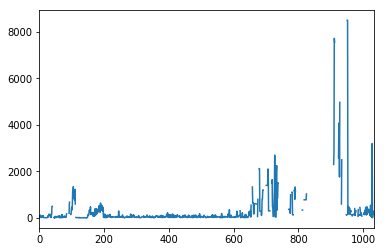

In [77]:
%matplotlib inline

df['distance'].plot()

### `Базовая визуализация на основе DataFrame`

Построим гистограмму на выходе значений метода `describe` для пары столбцов:

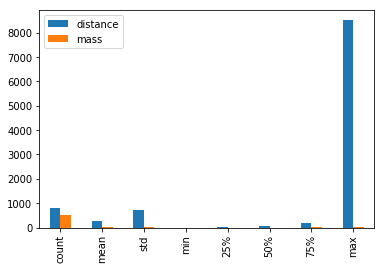

In [78]:
df.describe()[['distance', 'mass']].plot.bar()

### `Базовая визуализация на основе DataFrame`

Построим круговую диаграмму значений столбца:

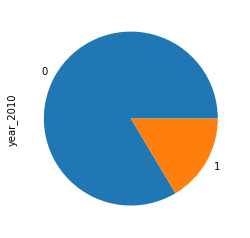

In [79]:
df['year_2010'] = df['year'].apply(lambda x: int(x > 2012))
df['year_2010'].value_counts().plot.pie()

### `Библиотека Matplotlib`

- Один из основных инструментов для визуализации разнообразных 2D и 3D графиков и диаграм<br><br>
- Позволяет создавать как статические, так и анимированные изображения<br><br>
- Поддерживаются много растровых и векторных форматов<br><br>
- Гибкая система настроек позволяет управлять внешним видом графика, комбинированием графиков, оформлением полотна, легенды и т.д.<br><br>
- На странице библиотеки есть вводный туториал: https://matplotlib.org/tutorials/introductory/pyplot.html#using-mathematical-expressions-in-text<br><br>
- У проекта хорошая документация, часто можно найти похожую на нужную диаграмму и кастомизировать её код под свои нужды (см. галерею https://matplotlib.org/3.1.1/gallery/index.html)<br><br>
- Возможность библиотеки очень велики, рассмотрим ниже несколько относительно простых примеров

### `Самый простой график`

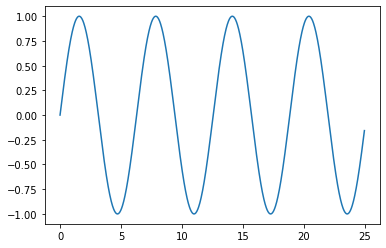

In [7]:
import matplotlib
import matplotlib.pyplot as plt

x = np.array(range(0, 1000, 1)) / 40
y = np.sin(x)

plt.figure()
plt.plot(x, y)

### `Немного форматирования, и выглядит лучше`

Text(0.5, 1.0, 'Plot function "y = sin(x)"')

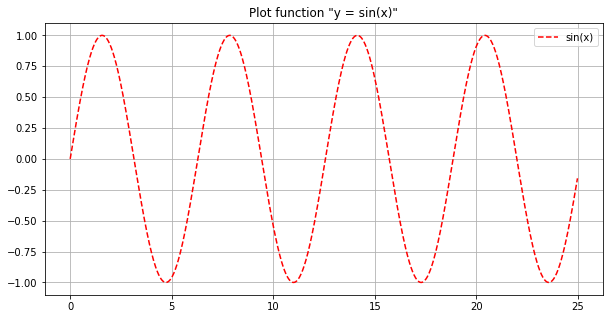

In [81]:
x = np.array(range(0, 1000, 1)) / 40
y = np.sin(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r--')

plt.legend(['sin(x)'], loc='upper right')
plt.grid(True)
plt.title('Plot function "y = sin(x)"')

### `Можно размещать несколько графиков на одном полотне`

Text(0.5, 1.0, 'Plot function "y = sin(x)"')

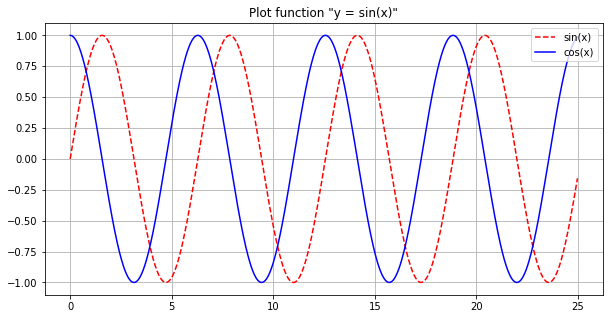

In [82]:
x = np.array(range(0, 1000, 1)) / 40
y, y_2 = np.sin(x), np.cos(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r--')
plt.plot(x, y_2, 'b')

plt.legend(['sin(x)', 'cos(x)'], loc='upper right')
plt.grid(True)
plt.title('Plot function "y = sin(x)"')

### `Можно размещать несколько графиков рядом`

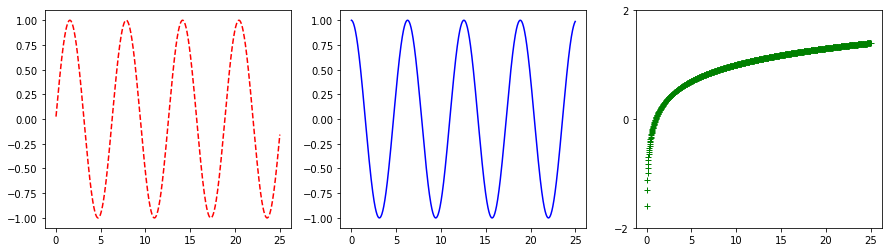

In [83]:
x = np.array(range(1, 1000, 1)) / 40
y, y_2, y_3 = np.sin(x), np.cos(x), np.log10(x)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(x, y, 'r--')

plt.subplot(1, 3, 2)
plt.plot(x, y_2, 'b')

plt.subplot(1, 3, 3)
plt.ylim((-2.0, 2.0))
plt.yticks(ticks=[-2.0, 0.0, 2.0])
plt.plot(x, y_3, 'g+')

plt.show()

### `Визуализация выборки`

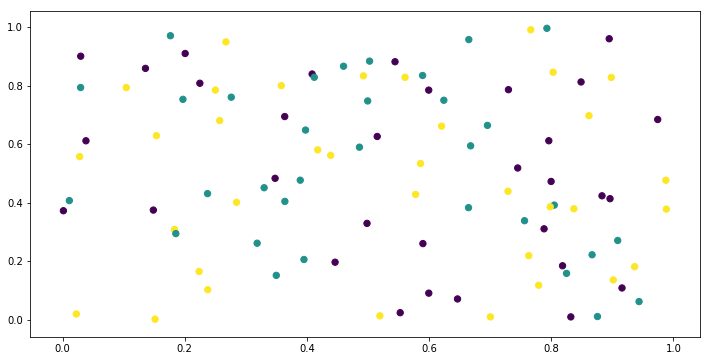

In [84]:
num_samples = 100
x, y = np.random.rand(num_samples), np.random.rand(num_samples)
labels = np.random.randint(low=0, high=3, size=num_samples)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=40, c=labels)  # s - area of circles
plt.show()

In [85]:
# level parameter should be tuned by hand for more convenient sight
def plot_results(model, X, y, level=1.0, cmap=plt.cm.OrRd, use_decision_function=True, plot_logreg=False):
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(8, 5))
    plt.clf()

    if hasattr(model, "support_vectors_"):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                    facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cmap, s=50)

    plt.axis('tight')

    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    x_bound = np.abs(x_max - x_min) / 10.0
    x_min -= x_bound
    x_max += x_bound

    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    y_bound = np.abs(y_max - y_min) / 10.0
    y_min -= y_bound
    y_max += y_bound

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

    if hasattr(model, "decision_function") and use_decision_function:
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    else:
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(6, 5))
    plt.pcolormesh(XX, YY, Z, cmap=cmap)
    if hasattr(model, "support_vectors_"):
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-level, 0, level])
    elif plot_logreg:
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1e-10, 0, 1e+10])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()

### `Визуализация выборки и разделяющей поверхности`

Здесь код уже большой и менее понятный, но всё равно легко гуглится (основа этого примера взята с сайта https://scikit-learn.org)

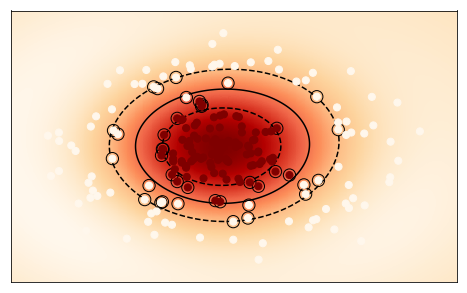

In [86]:
from sklearn.datasets import make_circles
from sklearn import svm

X, y = make_circles(noise=0.2, factor=0.2, random_state=1, n_samples=200)

model = svm.SVC(kernel='rbf', C=1.0, gamma=1.0)
model.fit(X, y)

plot_results(model, X, y, level=0.98)

### `Библиотека NetworkX`

- Позволяет работать с графами, в узлах которых могут находиться любые объекты<br><br>

- Имеет встроенные процедуры создания графов базовых типов<br><br>

- Реализует множество алгоритмов на графах, позволяет получать характеристики графов<br><br>

- Поддерживается основные форматы хранения графов в файлах<br><br>

- Имеет встроенные инструменты для визуализации графов (на базе mathplotlib и GraphViz)<br><br>

- В качестве базовой структуры данных использует словарь (`dict`)

### `Основные классы графов`

- `Graph` - простой неориентированнsq граф. Кратные ребра игнорируются, допускаются петли.
- `DiGraph` - ориентированный версия `Graph`
- `MultiGraph` - неориентированный граф, допускающий кратные ребра
- `MultiDiGraph` - ориентированная версия `MultiDiGraph`

In [204]:
import networkx as nx
G = nx.Graph()
G

### `Создание графа`

Доступны три способа создания:
- Явное добавление вершин и ребер в скрипте
- Генерация графа с помощью алгоритмов создания стандартных сетевых топологий
- Импортирование существующего графа из файла

Явное создание графа:

In [205]:
G.add_node(1)
G.add_nodes_from([2, 3])
G.nodes

NodeView((1, 2, 3))

In [206]:
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (1, 3)])
G.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

### `Визуализация графа`

Построенный граф можно несложно визуализировать на плоскости средствами NetworkX:

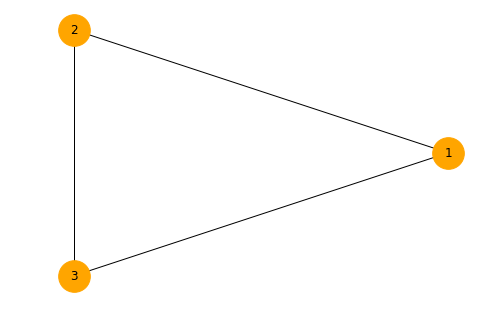

In [207]:
nx.draw_circular(G, node_color='orange', node_size=1000, with_labels=True)

### `Удаление данных из графа`

Можно удалить ребра:

In [208]:
G.remove_edge(1, 3)
G.edges

EdgeView([(1, 2), (2, 3)])

Можно удалить вершину (будут удалены все инцидентные ребра):

In [209]:
G.remove_node(2)
G.edges

EdgeView([])

Можно очистить весь граф:

In [210]:
G.clear()
print(G.number_of_edges(), G.number_of_nodes())

0 0


### `Генерация графов`

Известные стандартные графы можно создавать с помощью встроенных методов:

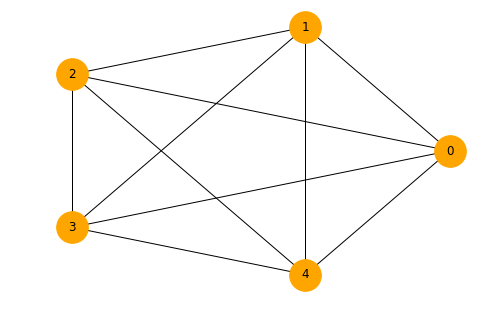

In [108]:
K_5 = nx.complete_graph(5)
nx.draw_circular(K_5, node_color='orange', node_size=1000, with_labels=True)

### `Генерация графов`

Генерировать также можно случайные графы:

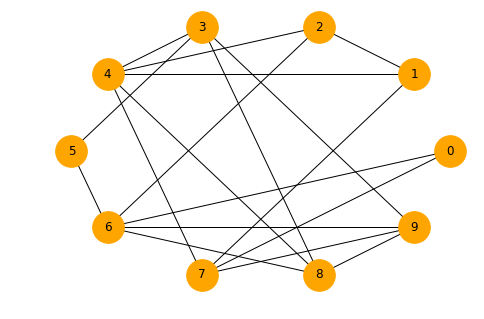

In [212]:
er = nx.erdos_renyi_graph(n=10, p=0.4)
nx.draw_circular(er, node_color='orange', node_size=1000, with_labels=True)

### `Создание графа из словаря или списка`

{('A', 'B'): Text(-0.14333660609105836, 0.4999999999999999, '1.5'),
 ('A', 'C'): Text(-0.04605598989461876, -0.4263681303277567, '2.0'),
 ('B', 'C'): Text(0.1893925959856784, -0.07363186967224339, '0.5')}

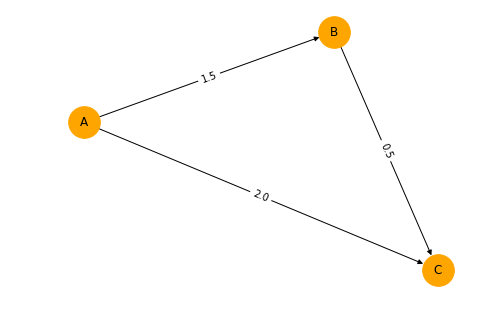

In [128]:
g = {'A': {'B': {'weight': 1.5}, 'C': {'weight': 2.0}},
     'B': {'C': {'weight': 0.5}}}

G = nx.DiGraph(g)

pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, node_color='orange', node_size=1000, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

### `Конвертация графа в словарь или список`

Конвертация в словарь словарей сохраняет всю информацию:

In [124]:
nx.convert.to_dict_of_dicts(G)

{'A': {'B': {'weight': 1.5}, 'C': {'weight': 2.0}},
 'B': {'C': {'weight': 0.5}},
 'C': {}}

Конвертация в список - только информацию о структуре графа:

In [125]:
nx.convert.to_dict_of_lists(G)

{'A': ['B', 'C'], 'B': ['C'], 'C': []}

### `Операции над графами`

In [ ]:
nx.subgraph(G, nodes)         # induced subgraph view of G on nodes in nodes
nx.union(G1, G2)              # graph union
nx.disjoint_union(G1, G2)     # graph union assuming all nodes are different
nx.cartesian_product(G1, G2)  # return Cartesian product graph
nx.compose(G1, G2)            # combine graphs identifying nodes common to both
nx.complement(G)              # graph complement
nx.create_empty_copy(G)       # return an empty copy of the same graph class
nx.to_undirected(G)           # return an undirected representation of G
nx.to_directed(G)             # return a directed representation of G

### `Операции над графами`

Выделение подграфа:

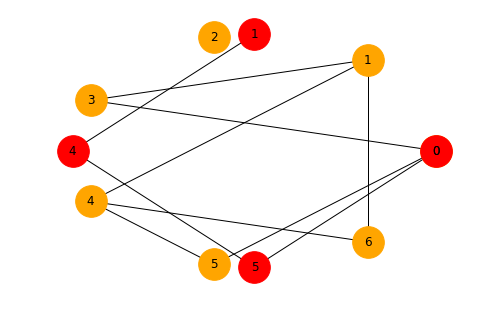

In [196]:
G = nx.erdos_renyi_graph(n=7, p=0.4)
nx.draw_circular(G, node_color='orange', node_size=1000, with_labels=True)
nx.draw_circular(nx.subgraph(G, [0, 1, 4, 5]), node_color='red', node_size=1000, with_labels=True)

### `Алгоритмы на графах`

В NetworkX реализовано много полезных алгоритмов для анализа и кластеризации графов, полный список есть в документации (https://networkx.org/documentation/stable/reference/algorithms/index.html)

Найдем кратчайший путь между парой вершин: 

[6, 1, 0, 3]


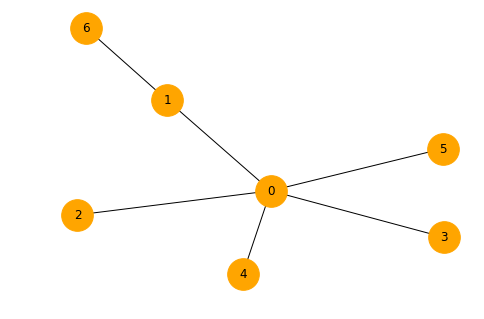

In [144]:
G = nx.full_rary_tree(5, 7)
nx.draw(G, node_color='orange', node_size=1000, with_labels=True)
print(nx.shortest_path(G, source=6, target=3))

### `Алгоритмы на графах`

Найдем все клики (полные подграфы) в алгоритме: 

[[0, 1, 2, 3, 4, 5]]

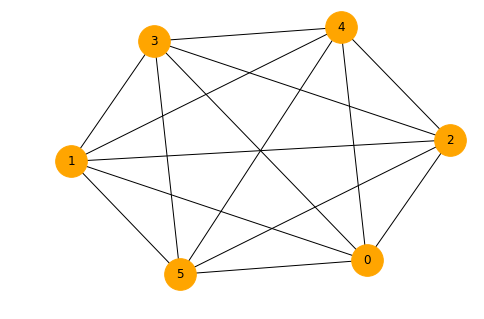

In [176]:
G = nx.complete_graph(6)
nx.draw(G, node_color='orange', node_size=1000, with_labels=True)
[e for e in nx.algorithms.clique.find_cliques(G)]

### `Алгоритмы на графах`

Выделение сообществ методом жадной максимизации модулярности: 

[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}), frozenset({12, 13, 14, 15, 16, 17, 18, 19, 20, 21})]


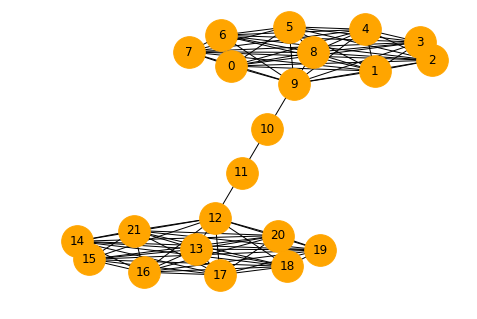

In [184]:
G = nx.barbell_graph(10, 2)

nx.draw_kamada_kawai(G, node_color='orange', node_size=1000, with_labels=True)
print(list(nx.algorithms.community.greedy_modularity_communities(G)))

По факту кластеризация и выделение сообществ - одна и та же задача, но в алгоритмах (и в реализациях) их часто описывают отдельно

### `Введение в библиотеку SciPy`

- SciPy - это библиотека для научных вычислений, решения оптимизационных, численных и статистических задач<br><br>
- Построена поверх NumPy<br><br>
- Эффективно реализует многие методы линейной алгебры и оптимизации<br><br>

Полезные ссылки:
- https://scipy-lectures.org/intro/scipy.html
- https://docs.scipy.org/doc/scipy/reference/

### `Состав SciPy`

__Что кратко рассмотрим:__

- `linalg` - линейная алгебра
- `optimize` - методы оптимизации и решения уравнений
- `sparse` - разреженные матрицы
- `stats` - вероятностные распределения и статистика

### `Состав SciPy`

__Что есть ещё:__

- `cluster` - алгоритмы кластеризации
- `constants` - физические и математические константы
- `fftpack` - инструменты для быстрого преобразования Фурье
- `integrate` - интегрирование и решение ОДУ
- `interpolate` - интерполяция и сплайны
- `io` - библиотека для работы с разными форматами входных и выходных данных
- `ndimage` - обработка N-мерных изображений
- `odr` - реализация Orthogonal distance regression
- `signal` - обработка сигналов
- `spatial` - пространственные структуры данных и алгоритмы
- `special` - набор специальных полезных функций
- `misc` - набор технических инструментов

### `Модуль scipy.linalg`

In [47]:
import numpy as np
from scipy import linalg

A = np.array([[1,2], [3, 4]])

In [38]:
linalg.det(A)  # determinant

-2.0

In [39]:
linalg.inv(A)  # inverted matrix

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [76]:
linalg.norm(A)  # matrix and vector norms

5.477225575051661

### `Модуль scipy.linalg`

In [77]:
for e in linalg.eig(A):  # eigen values and vectors
    print(e)

[-0.37228132+0.j  5.37228132+0.j]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [45]:
U, diags, V_T = linalg.svd(A)  # SVD
U @ np.diag(diags) @ V_T

array([[1., 2.],
       [3., 4.]])

In [81]:
P, L, U = linalg.lu(A)  # pivoted LU decomposition
P @ L @ U

array([[1., 2.],
       [3., 4.]])

### `Модуль scipy.optimize`

Сгенерируем точки с помощью синусоиды с шумом и попробуем восстановить параметры функции

In [83]:
from scipy import optimize

In [82]:
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

In [84]:
def func_to_fit(x, a, b):
    return a * np.sin(b * x)

In [87]:
params, params_covariance = optimize.curve_fit(func_to_fit, x_data, y_data)
print(params)

[2.97536914 1.51777949]


### `Модуль scipy.optimize`

Найдём минимум скалярной функции на отрезке (зависит от стартового приближения)

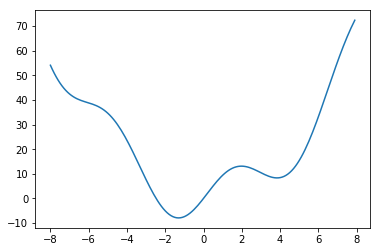

In [97]:
def f(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-8, 8, 0.1)
plt.plot(x, f(x)) 
plt.show() 

In [107]:
result = optimize.minimize(f, x0=4, bounds=((-8, 8),))  # 'bounds' is optional
result.x

array([3.83746783])

### `Модуль scipy.optimize`

Найдём минимум скалярной функции на отрезке (зависит от стартового приближения)

In [108]:
result = optimize.minimize(f, x0=0, bounds=((-8, 8),))  # 'bounds' is optional
result.x

array([-1.30643989])

In [123]:
result = optimize.basinhopping(f, x0=4, niter=1000)
result.x

array([-1.30644001])

Функция `optimize.minimize` имеет параметр `method`, в котором можно определять конкрентный метод оптимизации, подходящий для решаемой задачи

### `Модуль scipy.optimize`

Найдём нули скалярной функции

In [126]:
root = optimize.root(f, x0=1)
root.x

array([0.])

In [127]:
root2 = optimize.root(f, x0=-2)
root2.x

array([-2.47948183])

Находим только один корень, ближайший к стартовой точке, нужно идти по сетке для поиска нескольких

### `Модуль scipy.sparse`

- Включает в себя набор различных типов разреженных матриц и инструментов для работы с ними
- Мы рассмотрим основные форматы разреженных матриц, которые могут быть полезны в приложениях<br><br>


- __Coordinate Format (COO)__
    - представляет собой 3 массива `row`, `col`, `data`
    - `row` содержит номера строк ненулевых элементов
    - `col` содержит номера столбцов ненулевых элементов
    - `data` содержит сами ненулевые элементы

In [183]:
from scipy.sparse import coo_matrix

S = np.array([[1, 0, 0], [4, 0, 6], [0, 8, 0]])

cm = coo_matrix(S)
cm.row, cm.col, cm.data

(array([0, 1, 1, 2], dtype=int32),
 array([0, 0, 2, 1], dtype=int32),
 array([1, 4, 6, 8]))

### `Модуль scipy.sparse`

- __Compressed Sparse Row Format (CSR)__
    - Представляет собой три массива: `indices`, `indptr`, `data`
    - `indices` содержит индексы столбцов ненулевых элементов
    - `data` содержит значения ненулевых элементов
    - `indptr` содержит старты строк в `indices` и `data` по следующим правилам:<br><br>
        - длина `indptr` равна числу строк + 1, последний элемент равен числу ненулевых элементов
        - ненулевые значения $i$-й строки лежат в `data[indptr[i]: indptr[i + 1]]`
        - их индексы столбцов - в `indices[indptr[i]: indptr[i + 1]]`
        - элемент $(i, j)$ доступ в `data[indptr[i]+k]`, где `k` - это позиция `j` в `indices[indptr[i]: indptr[i + 1]]`

In [191]:
from scipy.sparse import csr_matrix

S = np.array([[1, 0, 0], [4, 0, 6], [0, 8, 0]])

csrm = csr_matrix(S)
csrm.indices, csrm.indptr, csrm.data

(array([0, 0, 2, 1], dtype=int32),
 array([0, 1, 3, 4], dtype=int32),
 array([1, 4, 6, 8], dtype=int64))

### `Модуль scipy.sparse`

- __Compressed Sparse Column Format (CSC)__
    - Представляет собой три массива: `indices`, `indptr`, `data`
    - `indices` содержит индексы строк ненулевых элементов
    - `data` содержит значения ненулевых элементов
    - `indptr` содержит старты столбцов в `indices` и `data` по следующим правилам:<br><br>
        - длина `indptr` равна числу столбцов + 1, последний элемент равен числу ненулевых элементов
        - ненулевые значения $i$-го столбца лежат в `data[indptr[i]: indptr[i + 1]]`
        - их индексы строк - в `indices[indptr[i]: indptr[i + 1]]`
        - элемент $(i, j)$ доступ в `data[indptr[j]+k]`, где `k` - это позиция `i` в `indices[indptr[j]: indptr[j + 1]]`

In [189]:
from scipy.sparse import csc_matrix

S = np.array([[1, 0, 0], [4, 0, 6], [0, 8, 0]])

cscm = csc_matrix(S)
cscm.indices, cscm.indptr, cscm.data

(array([0, 1, 2, 1], dtype=int32),
 array([0, 2, 3, 4], dtype=int32),
 array([1, 4, 8, 6], dtype=int64))

### `Модуль scipy.stats`

По выборке восстанавливаем параметры известного распределения

In [131]:
from scipy import stats

samples = np.random.normal(size=1000, loc=9.8, scale=3.5)
loc, scale = stats.norm.fit(samples)

print(loc, scale)

9.741960556850568 3.4757631659935404


In [166]:
samples = np.random.beta(a=1, b=4.6, size=5000) + 10

a, b, loc, scale = stats.beta.fit(samples)
print(a, b, loc, scale)

1.0413361865370578 5.11430475356927 10.000013770776315 1.0415417093315682


### `Модуль scipy.stats`

Посчитаем статистики выборки:

In [169]:
samples = np.random.normal(size=1000, loc=0.0, scale=1.0)

np.mean(samples) 

0.02142806582351614

In [170]:
np.median(samples)

0.04760864966009848

In [171]:
stats.scoreatpercentile(samples, 50)  # median

0.04760864966009848

In [172]:
stats.scoreatpercentile(samples, 90)

1.2622387134592612

### `Проверка статистических гипотез`

- Общая идея:
    - Дана наблюдаемая выборка данных
    - Формулируется _гипотеза_ $H_0$ - определённое предположение о распределении вероятностей, лежащем в основе наблюдаемой выборки
    - Формулируется альтернативная гипотеза $H_1$
    - Выбирается _статистический критерий_ (обычно это какая-то статистика выборки)
    - На основании выборки вычисляется значение статистического критерия $T$
    - На основании этого значения вычисляется _достигаемый уровень значимости_ $p(T)$ (p-value) - вероятность получить значение критерия такое же или ещё более экстремальное, чем T, при условии справедливости $H_0$
    - Если $p(T)$ достаточно мало (например, меньше уровня значимости $\alpha$), то $H_0$ отвергается


- Проверка гипотез доступна в `scipy.stats` и основанном на нем модуле `statsmodel`

### `Пример: T-критерий`

- T-критерий (тест Стьдента) используется для проверки гипотез о
    - равенстве матожиданий двух выборок
    - равенстве матожидания одной выборки заданному значению<br><br>
- В случае двух выборок, которые должны быть из распределения, близкого к нормальному, считается величина
$$
    t = \cfrac{m_1 - m_2}{\sqrt{\cfrac{d_1}{n_1} - \cfrac{d_2}{n_2}}},
$$
где
    - $m_i$ - выборочные средние
    - $d_i$ - выборочные дисперсии
    - $n_i$ - размеры выборок

### `Пример: T-критерий`

- Определим функцию для генерации и визуализации выборок из нормального распределения:

In [16]:
def gen_normal_samples(mean_1, mean_2):
    samples1 = np.random.normal(mean_1, size=1000)
    samples2 = np.random.normal(mean_2, size=1000)

    bins = np.linspace(-4, 4, 30)
    histogram1, bins = np.histogram(samples1, bins=bins, density=True)
    histogram2, bins = np.histogram(samples2, bins=bins, density=True)

    plt.figure(figsize=(6, 4))
    plt.hist(samples1, bins=bins, density=True, label="Samples 1")
    plt.hist(samples2, bins=bins, density=True, label="Samples 2")
    plt.legend(loc='best')
    plt.show()
    
    return samples1, samples2

- Воспользуемся тестов `scipy.stats.ttest_ind` для проверки гипотезы о равенстве средних выборок:

In [15]:
#?stats.ttest_ind

#Calculate the T-test for the means of *two independent* samples of scores.

#This is a two-sided test for the null hypothesis that 2 independent samples
#have identical average (expected) values. This test assumes that the
#populations have identical variances by default.

### `Пример: T-критерий`

- Посчитаем статистический T-тест для случая выборок из нормального распределения с априорно далекими средними:

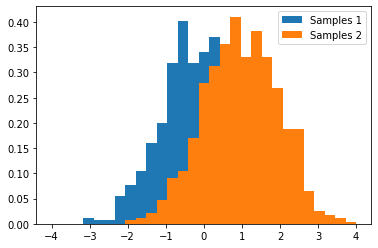

In [17]:
samples_1, samples_2 = gen_normal_samples(mean_1=0, mean_2=1)

In [13]:
t_score, p_value = stats.ttest_ind(samples_1, samples_2)
t_score, p_value

(-22.811748466910718, 1.4744148595046789e-102)

- Большое по модулю значений `t_score` означает большую разность между двумя порождающими случайными процессами
- Значение `p_value` характеризует вероятность того, что обе выборки были порождены процессами с одинаковым матожиданием

### `Пример: T-критерий`

- Посчитаем статистический T-тест для случая выборок из нормального распределения с априорно близкими средними:

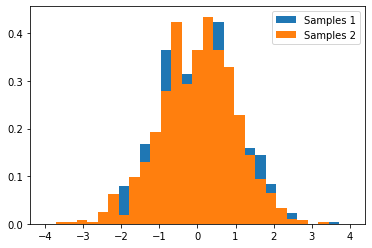

In [28]:
samples_1, samples_2 = gen_normal_samples(mean_1=-0.005, mean_2=0.005)

In [29]:
t_score, p_value = stats.ttest_ind(samples_1, samples_2)
t_score, p_value

(0.38154500791328017, 0.7028394515322199)

## `Спасибо за внимание!`